In [1]:
import requests                          
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

source = requests.get('https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc')   

source.raise_for_status()

soup = BeautifulSoup(source.text, 'html.parser')
#print(soup)

In [2]:
movies = soup.find_all('div', class_ = "lister-item mode-advanced")
len(movies)

50

In [3]:
name=[]
year=[]
runtime=[]
genre=[]
ranking=[]
desc=[]
director=[]
stars=[]
gross=[]
vote=[]

for i in movies:
  name.append(i.find('h3').find("a").text)
  year.append(i.find('h3').find('span',class_="lister-item-year text-muted unbold").text.strip("()"))
  runtime.append(i.find('p',class_="text-muted").find('span',class_="runtime").text)
  genre.append(i.find('p',class_="text-muted").find('span',class_="genre").get_text(strip=True))
  ranking.append(i.find('div',class_="ratings-bar").find('div',class_="inline-block ratings-imdb-rating").get_text(strip=True))
#  desc.append(i.find('p',attrs={"class": None}))
#  director.append(i.find('div',class_="lister-item-content").find("a").text)
#  stars.append(i.find('div',class_="lister-item-content").find("a").text)
#  gross.append(i.find('p',class_="sort-num_votes-visible").find('span',class_="text-muted").string)
  vote.append(i.find('p',attrs={"name":"nv"}))


#print(ranking.parent.find_next_sibling())
df=pd.DataFrame({'name':name,
   'year':year,
   'runtime':runtime,
   'genre':genre,
   'ranking':ranking,
   'vote':vote})
#   'desc':desc})
#   'director':director
#   'gross':gross
df

#i can go to the urls(https://blog.jovian.ai/web-scraping-most-rated-movies-on-imdb-using-python-91d12c492907),
#and scrape data accordingly

#i wanted to go to the multiple urls connected to the name and go to each url and get all description, but 
#the name of the classes are different 

,name,year,runtime,genre,ranking,vote
0,The Shawshank Redemption,1994,142 min,Drama,9.3,None
1,The Godfather,1972,175 min,"Crime, Drama",9.2,None
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,None
3,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",9.0,None
4,The Godfather Part II,1974,202 min,"Crime, Drama",9.0,None
5,Schindler's List,1993,195 min,"Biography, Drama, History",9.0,None
6,12 Angry Men,1957,96 min,"Crime, Drama",9.0,None
7,Pulp Fiction,1994,154 min,"Crime, Drama",8.9,None
8,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,"Action, Adventure, Drama",8.8,None
9,Fight Club,1999,139 min,Drama,8.8,None


In [4]:
#How big is the data?

df.shape

(50, 6)

In [5]:
#How does the data look like?

df.head(2)

,name,year,runtime,genre,ranking,vote
0,The Shawshank Redemption,1994,142 min,Drama,9.3,None
1,The Godfather,1972,175 min,"Crime, Drama",9.2,None


In [6]:
df.sample(3)   #3 random rows to remove bias

,name,year,runtime,genre,ranking,vote
29,Seven Samurai,1954,207 min,"Action, Drama",8.6,None
1,The Godfather,1972,175 min,"Crime, Drama",9.2,None
46,The Pianist,2002,150 min,"Biography, Drama, Music",8.5,None


In [7]:
#What is the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     50 non-null     object
 1   year     50 non-null     object
 2   runtime  50 non-null     object
 3   genre    50 non-null     object
 4   ranking  50 non-null     object
 5   vote     0 non-null      object
dtypes: object(6)
memory usage: 2.5+ KB


In [8]:
#are there any missing values?

df.isnull().sum()

name        0
year        0
runtime     0
genre       0
ranking     0
vote       50
dtype: int64

In [9]:
#How does the data look mathematically?

df.describe()

,name,year,runtime,genre,ranking,vote
count,50,50,50,50,50,0
unique,50,34,41,35,8,0
top,The Shawshank Redemption,1994,130 min,"Crime, Drama",8.5,NaN
freq,1,5,3,6,19,NaN


In [10]:
#Are there duplicate values?

df.duplicated().sum()

0

In [11]:
#How is the correlation?

df.corr()

""


In [12]:
#UNI VARIATE analysis

df.head(2)

,name,year,runtime,genre,ranking,vote
0,The Shawshank Redemption,1994,142 min,Drama,9.3,None
1,The Godfather,1972,175 min,"Crime, Drama",9.2,None


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


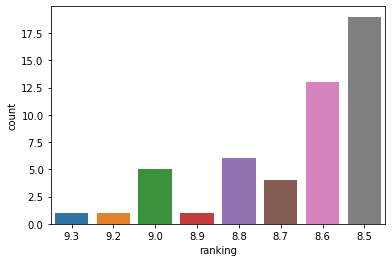

In [13]:
# 1. Categorical Data

# a. Countplot

sns.countplot(df['ranking'])

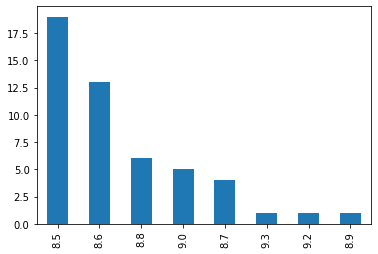

In [14]:
df['ranking'].value_counts().plot(kind='bar')

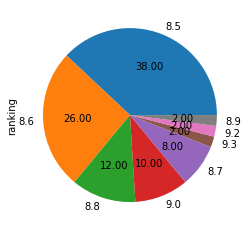

In [15]:
# b.Pie chart

df['ranking'].value_counts().plot(kind='pie',autopct='%.2f');

(array([8., 3., 6., 6., 4., 5., 6., 3., 5., 4.]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <a list of 10 Patch objects>)

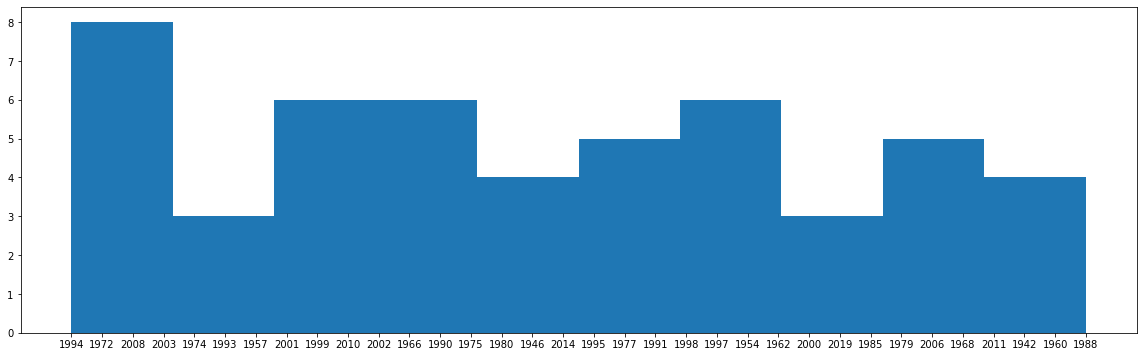

In [16]:
# 2.Numerical Data

# a.Histogram is for continuous data to see their frequency

plt.figure(figsize=(20,6))
plt.hist(df['year'])

In [17]:
df.sort_values("ranking",inplace=True)
df

,name,year,runtime,genre,ranking,vote
49,Grave of the Fireflies,1988,89 min,"Animation, Drama, War",8.5,None
31,Whiplash,2014,106 min,"Drama, Music",8.5,None
32,Gladiator,2000,155 min,"Action, Adventure, Drama",8.5,None
33,Parasite,2019,132 min,"Drama, Thriller",8.5,None
34,Back to the Future,1985,116 min,"Adventure, Comedy, Sci-Fi",8.5,None
35,Léon: The Professional,1994,110 min,"Action, Crime, Drama",8.5,None
37,The Departed,2006,151 min,"Crime, Drama, Thriller",8.5,None
38,The Prestige,2006,130 min,"Drama, Mystery, Sci-Fi",8.5,None
39,American History X,1998,119 min,"Crime, Drama",8.5,None
36,Alien,1979,117 min,"Horror, Sci-Fi",8.5,None


(array([19., 13.,  4.,  0.,  6.,  1.,  0.,  5.,  1.,  1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

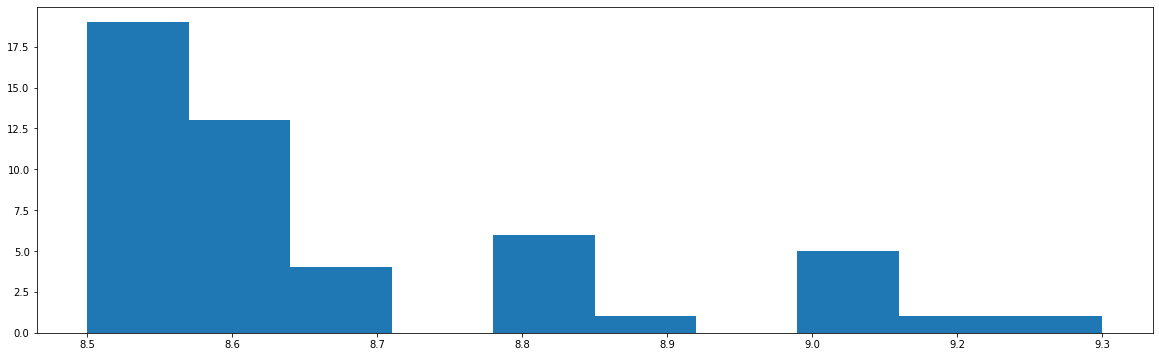

In [18]:
plt.figure(figsize=(20,6))
plt.hist(df['ranking'])     #we can give bins to change the distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


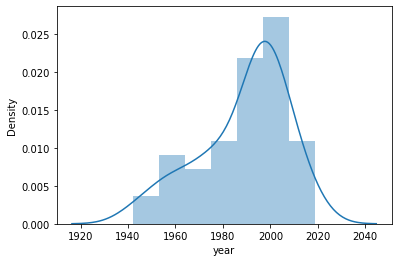

In [19]:
# 2. Distplot

sns.distplot(df['year'])

In [ ]:
# c. Boxplot

